# Data Loading

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [70]:
df = pd.read_csv('glass+identification/glass.csv', 
                 names=['id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'type_of_glass'],
                index_col=0)

In [4]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type_of_glass
id,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 1 to 214
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RI             214 non-null    float64
 1   Na             214 non-null    float64
 2   Mg             214 non-null    float64
 3   Al             214 non-null    float64
 4   Si             214 non-null    float64
 5   K              214 non-null    float64
 6   Ca             214 non-null    float64
 7   Ba             214 non-null    float64
 8   Fe             214 non-null    float64
 9   type_of_glass  214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.4 KB


In [6]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type_of_glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


# EDA + Feature Engineering

<AxesSubplot: xlabel='type_of_glass', ylabel='count'>

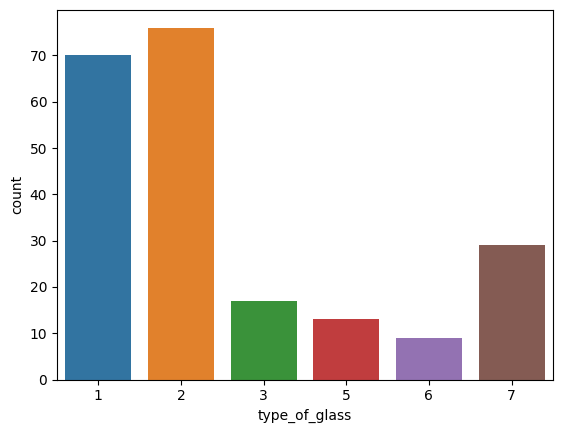

In [46]:
sns.countplot(x='type_of_glass', data=df)

From the docs provided with the dataset:
> 9. Class Distribution: (out of 214 total instances)  
    - 163 Window glass (building windows and vehicle windows)  
       - 87 float processed  
          - 70 building windows  
          - 17 vehicle windows  
       - 76 non-float processed  
          - 76 building windows  
          - 0 vehicle windows  
    - 51 Non-window glass  
       - 13 containers  
       - 9 tableware  
       - 29 headlamps
       
Using this information, we can add an extra column for whether or not the glass in a window glass or not. Categories 1, 2, 3, and 4 (although not present in this dataset) are window glass, and categories 5, 6, and 7 are non-window glass.

In [71]:
df['window'] = df['type_of_glass'].isin([1, 2, 3, 4]).astype('int64')
df['window']

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type_of_glass,window
id,,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7,0
211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7,0
212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7,0


From the heatmap, we can see that Mg has a strong negative correlation to the type of glass. Ba also  has a decently strong positive correlation to type of glass.  
(While window and the type of glass also have a strong correlation, that is only to be expected because the window column was derived from the type of glass.)

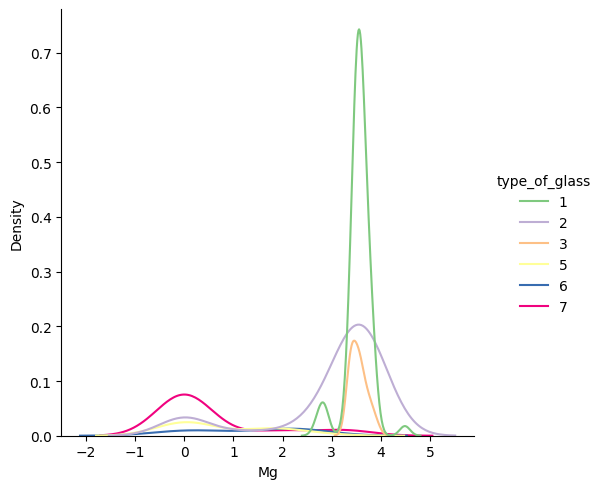

In [8]:
sns.displot(x='Mg', hue='type_of_glass', kind='kde', palette='Accent', data=df)

Using the distribution plot, we can see that each type of glass tends to have magnesium values that fall in certain ranges. Type 1 tends to have magnesium values between 2 and 5, with most having around 3.5. Type 2 has a wider range, but most tend to have around 0 or 3.5 percent. Type 3 has a narrower range with most of them falling between 3 and 4. Types 5 and 6 have more spread out values than the other types of glass. Most of type 7 glass have values between -1 and 1, with most hsving around 0, although some have up to values of 4.

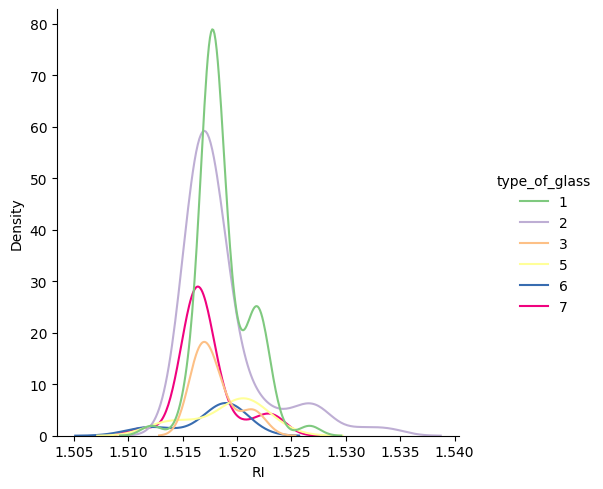

In [9]:
sns.displot(x='RI', hue='type_of_glass', kind='kde', palette='Accent', data=df)

# Modeling using Pipelines

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [55]:
y = df.pop('type_of_glass')

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=0)
pipeline = Pipeline([('scaler', StandardScaler()), 
                     ('dim', PCA()),
                     ('model', SVC(random_state=0))])

Here we create a pipeline for our model. The data will first go through standardization, dimension reduction through PCA, and will finally be modeled using SVC. PCA and SVC will be used with default parameters for now.

In [14]:
from sklearn.model_selection import cross_validate

In [56]:
scores = cross_validate(pipeline, X_train, y_train)
scores

{'fit_time': array([0.00944901, 0.00600767, 0.00519514, 0.00418091, 0.005898  ]),
 'score_time': array([0.00337601, 0.00247407, 0.00165701, 0.00154996, 0.00174999]),
 'test_score': array([0.76666667, 0.7       , 0.7       , 0.73333333, 0.79310345])}

In [57]:
scores['test_score'].mean()

0.7386206896551725

We can now cross-validate to check our accuracy. The average test score is around 73.86% which we can try to improve.

## Hyper-Parameter Tuning

### Selecting Method for Dimension Reduction and Modeling

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif

In [58]:
params = [{'dim__n_components': [2, 5, 8], 
          'model': [LogisticRegression(), SGDClassifier(), KNeighborsClassifier(), 
                    DecisionTreeClassifier(), RandomForestClassifier(), SVC()]},
         {'dim': [SelectKBest(mutual_info_classif)], 
          'dim__k': [2, 5, 8], 
          'model': [LogisticRegression(), SGDClassifier(), KNeighborsClassifier(), 
                    DecisionTreeClassifier(), RandomForestClassifier(), SVC()]}]

After importing other algorithms to try, we can create a dictionary of parameters we'd like to try out. The first element is the number of features for dimension reduction, and the second parameter is a list of models we'd like to try. All of the models are being used with their default parameters, and then we can tune the parameters for the one model that had the best results.

In [59]:
grid = GridSearchCV(pipeline, param_grid=params)
grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('dim', PCA()),
                                       ('model', SVC(random_state=0))]),
             param_grid=[{'dim__n_components': [2, 5, 8],
                          'model': [LogisticRegression(), SGDClassifier(),
                                    KNeighborsClassifier(),
                                    DecisionTreeClassifier(),
                                    RandomForestClassifier(), SVC()]},
                         {'dim': [SelectKBest(k=8,
                                              score_func=<function mutual_info_classif at 0x7fb58d260b80>)],
                          'dim__k': [2, 5, 8],
                          'model': [LogisticRegression(), SGDClassifier(),
                                    KNeighborsClassifier(),
                                    DecisionTreeClassifier(),
                                    RandomForestClassifier(), SVC()]}])

In [60]:
grid.best_params_

{'dim': SelectKBest(k=8, score_func=<function mutual_info_classif at 0x7fb58d260b80>),
 'dim__k': 8,
 'model': RandomForestClassifier()}

The best parameters were reducing dimensionality using SelectKBest with k=8 with the Random Forest Classifier model.

In [61]:
pipeline.set_params(dim=SelectKBest(k=8, score_func=mutual_info_classif), model=RandomForestClassifier(random_state=0))

Pipeline(steps=[('scaler', StandardScaler()),
                ('dim',
                 SelectKBest(k=8,
                             score_func=<function mutual_info_classif at 0x7fb58d260b80>)),
                ('model', RandomForestClassifier(random_state=0))])

We can change the steps of our pipeline to match the best parameters.

### Hyper-Parameter Tuning the Model

In [62]:
params = {'model__n_estimators': [100, 150, 200, 250], 
          'model__min_samples_split': [2, 3, 5], 
          'model__min_samples_leaf': [1, 2, 3]}

Now that we have our model selected, it's time to optimize it. Above is a new set of parameters that will be tuned.

In [64]:
grid = GridSearchCV(pipeline, param_grid=params)
grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('dim',
                                        SelectKBest(k=8,
                                                    score_func=<function mutual_info_classif at 0x7fb58d260b80>)),
                                       ('model',
                                        RandomForestClassifier(random_state=0))]),
             param_grid={'model__min_samples_leaf': [1, 2, 3],
                         'model__min_samples_split': [2, 3, 5],
                         'model__n_estimators': [100, 150, 200, 250]})

In [65]:
grid.best_params_

{'model__min_samples_leaf': 1,
 'model__min_samples_split': 5,
 'model__n_estimators': 150}

In [66]:
# pipeline.set_params(model__min_samples_leaf=2, model__min_samples_split=3, model__n_estimators=250)
pipeline.set_params(model__min_samples_split=5, model__n_estimators=150)

Pipeline(steps=[('scaler', StandardScaler()),
                ('dim',
                 SelectKBest(k=8,
                             score_func=<function mutual_info_classif at 0x7fb58d260b80>)),
                ('model',
                 RandomForestClassifier(min_samples_split=5, n_estimators=150,
                                        random_state=0))])

After running GridSearchCV, we get our optimal parameters, and we get change the parameters of the model in our pipeline.

In [67]:
scores = cross_validate(pipeline, X_train, y_train)
scores

{'fit_time': array([0.21096492, 0.20200896, 0.19612598, 0.19934893, 0.21891499]),
 'score_time': array([0.01336503, 0.01490784, 0.01356101, 0.01315999, 0.01458097]),
 'test_score': array([0.8       , 0.8       , 0.8       , 0.86666667, 0.82758621])}

In [68]:
scores['test_score'].mean()

0.8188505747126438

After running cross-validation on our model again, we see that our mean test score has had a marginal increase from  73.86% to 81.89%.